In [1]:
import pandas as pd

pd.set_option("display.max_columns", None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging

logging.getLogger("matplotlib.font_manager").disabled = True

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

df = pd.read_csv("./data/cleaned.csv")

In [2]:
from pycaret.classification import *

clf = setup(data=df, target="quality", session_id=42)

best_model = compare_models(exclude=["lightgbm"])  # doesn't work why?

predict_model(best_model)

,Description,Value
0,Session id,42
1,Target,quality
2,Target type,Binary
3,Original data shape,"(3973, 12)"
4,Transformed data shape,"(3973, 12)"
5,Transformed train set shape,"(2781, 12)"
6,Transformed test set shape,"(1192, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8630,0.9075,0.5539,0.8116,0.6547,0.5736,0.5918,0.1060
rf,Random Forest Classifier,0.8605,0.8951,0.5645,0.7868,0.6555,0.5714,0.5848,0.1530
gbc,Gradient Boosting Classifier,0.8220,0.8546,0.4596,0.6858,0.5489,0.4438,0.4582,0.0920
ada,Ada Boost Classifier,0.7968,0.8218,0.4462,0.5983,0.5100,0.3854,0.3927,0.0390
qda,Quadratic Discriminant Analysis,0.7914,0.8206,0.5251,0.5636,0.5427,0.4081,0.4091,0.0100
lda,Linear Discriminant Analysis,0.7886,0.7659,0.3157,0.5988,0.4125,0.2992,0.3221,0.0090
dt,Decision Tree Classifier,0.7853,0.7139,0.5781,0.5462,0.5587,0.4178,0.4200,0.0120
lr,Logistic Regression,0.7850,0.7567,0.2565,0.6114,0.3597,0.2562,0.2917,0.4750
ridge,Ridge Classifier,0.7799,0.7564,0.1836,0.6178,0.2808,0.1952,0.2455,0.0110
dummy,Dummy Classifier,0.7630,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0090


/home/dongwonmoon/Workspace/Recipe-Optimize/recipe/lib/python3.10/site-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8540,0.9086,0.5548,0.7659,0.6434,0.5546,0.5660


,sulfur dioxide diff,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
1047,136.0,7.8,0.13,0.30,1.80,0.040,43.0,0.99550,3.43,0.41,9.000000,0,0,0.84
2362,82.0,6.8,0.27,0.29,4.60,0.046,6.0,0.99458,3.34,0.48,10.600000,0,0,0.75
2774,74.0,6.1,0.36,0.26,8.15,0.035,14.0,0.99031,3.06,0.27,13.000000,1,1,0.59
2673,29.0,6.0,0.20,0.26,1.10,0.033,38.0,0.98954,3.14,0.38,11.500000,0,0,0.64
3360,53.0,6.6,0.25,0.32,5.60,0.039,15.0,0.99163,2.96,0.52,11.100000,0,0,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,135.0,7.2,0.24,0.40,17.85,0.049,50.0,1.00000,3.34,0.42,9.600000,0,0,0.87
523,133.0,7.1,0.17,0.38,7.40,0.052,49.0,0.99580,3.35,0.52,9.600000,0,0,1.00
601,75.0,7.1,0.28,0.44,1.80,0.032,32.0,0.99070,3.25,0.48,12.200000,1,1,0.54
1987,85.0,6.9,0.13,0.28,13.30,0.050,47.0,0.99655,3.34,0.42,10.100000,0,0,0.82


In [4]:
from scipy import stats
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 데이터 분리
X, y = df.iloc[:, :-1], df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 모델 학습
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

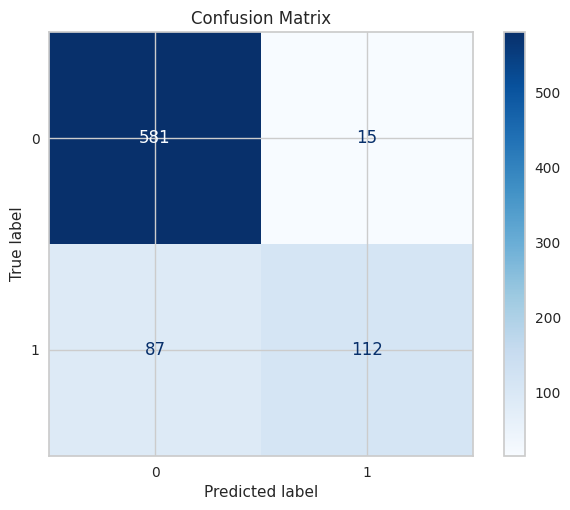

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    RocCurveDisplay,
)
from sklearn.metrics import (
    precision_recall_curve,
    PrecisionRecallDisplay,
    classification_report,
)
import matplotlib.pyplot as plt
import shap

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

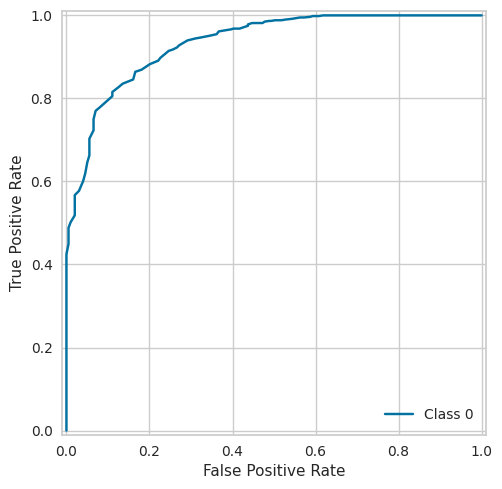

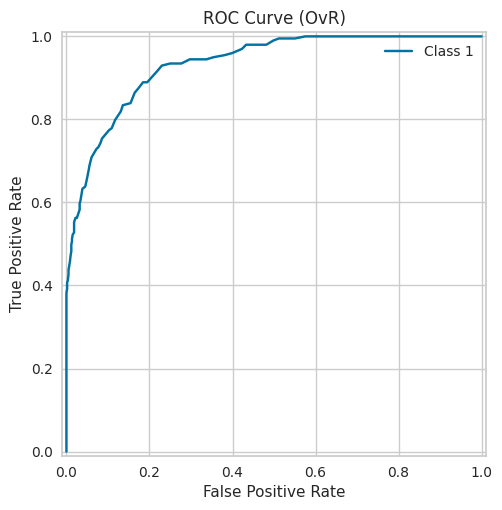

In [9]:
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_proba[:, i])
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label=f"Class {i}")
plt.title("ROC Curve (OvR)")
plt.legend()
plt.show()

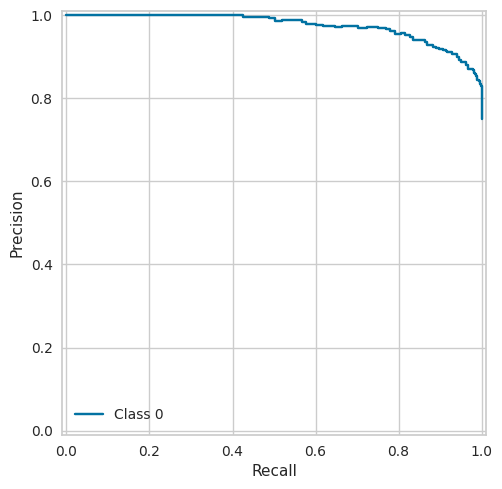

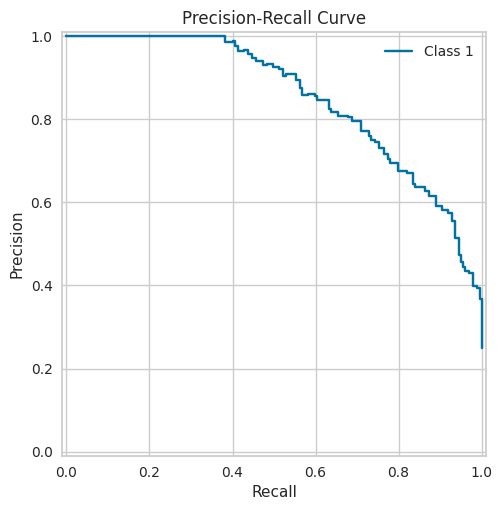

In [ ]:
for i in range(len(model.classes_)):
    precision, recall, _ = precision_recall_curve(
        (y_test == i).astype(int), y_proba[:, i]
    )
    PrecisionRecallDisplay(precision=precision, recall=recall).plot(label=f"Class {i}")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [13]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)